# PROJET MACHINE LEARNING EN PYTHON

# I. Exploration des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
import seaborn as sns

In [2]:
def load_data():
    path = "./data/loan_approval_dataset.csv"
    data = pd.read_csv(path)
    data = data.drop("loan_id", axis=1)

    data["loan_status"] = data["loan_status"].replace(" Approved", 1)
    data["loan_status"] = data["loan_status"].replace(" Rejected", 0)

    data["education"] = data["education"].replace(" Graduate", 1)
    data["education"] = data["education"].replace(" Not Graduate", 0)

    data["self_employed"] = data["self_employed"].replace(" Yes", 1)
    data["self_employed"] = data["self_employed"].replace(" No", 0)

    target = data["loan_status"]
    data = data.drop("loan_status", axis=1)
    return data, target

In [3]:
data, target = load_data()

In [4]:
def plot_histo_target(target):
    plt.figure(1)
    categories_counts = target.value_counts()
    bars = plt.bar(
        categories_counts.index, categories_counts.values, color="red", edgecolor="black", alpha=0.4
    )
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom")
    plt.xticks(sorted(list(categories_counts.index)))
    plt.xlabel("Catégories")
    plt.title('Variable à prédire : loan_status')
    plt.tight_layout()

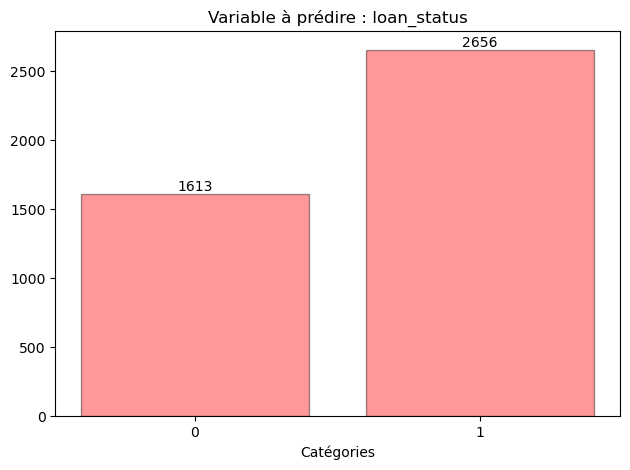

In [5]:
plot_histo_target(target)

In [6]:
def types_var(data, verbose=False):
    variables_numeriques = []
    variables_categorielles = []
    variables_binaires = []

    for colu in data.columns:
        if str(data[colu].dtypes) in ["int32", "int64", "float64"]:
            if len(data[colu].unique()) == 2:
                variables_binaires.append(colu)
            else:
                if len(data[colu].unique()) < 50:
                    variables_categorielles.append(colu)
                else:
                    variables_numeriques.append(colu)
        else:
            if len(data[colu].unique()) == 2:
                variables_binaires.append(colu)
            else:
                variables_categorielles.append(colu)
    if verbose:
        print(f"Nombre de variables numériques : {len(variables_numeriques)}")
        print(f"Nombre de variables catégorielles : {len(variables_categorielles)}")
        print(f"Nombre de variables binaires : {len(variables_binaires)}")
    return variables_numeriques, variables_categorielles, variables_binaires

In [7]:
var_num_names, var_cat_names, var_bin_names = types_var(data, verbose=True)

Nombre de variables numériques : 7
Nombre de variables catégorielles : 2
Nombre de variables binaires : 2


In [8]:
### Fonction affichant les distributions des variables catégorielles

def plot_categorielles(data, var_cat_names):
    fig, axs = plt.subplots(2, 2)
    plt.suptitle("Variables catégorielles")

    titles = [el.replace('_', ' ').title() for el in var_cat_names]
    name1 = var_cat_names[0]
    title1 = titles[0]
    categories_counts1 = data[name1].value_counts()
    bars1 = axs[0, 0].bar(
        categories_counts1.index, categories_counts1.values, color="green", edgecolor="black", alpha=0.4
    )
    for bar in bars1:
        yval = bar.get_height()
        axs[0, 0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom")
    axs[0, 0].set_xticks(sorted(list(categories_counts1.index)))
    axs[0, 0].set_xlabel(title1, fontsize=10)
    axs[0, 0].set_ylim([0, 900])

    name2 = var_cat_names[1]
    title2 = titles[1]
    categories_counts2 = data[name2].value_counts()
    bars2 = axs[0, 1].bar(
        categories_counts2.index, categories_counts2.values, color="green", edgecolor="black", alpha=0.4
    )
    for bar in bars2:
        yval = bar.get_height()
        axs[0, 1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom")
    axs[0, 1].set_xticks(sorted(list(categories_counts2.index)))
    axs[0, 1].set_xlabel(title2, fontsize=10)
    axs[0, 1].set_ylim([0, 600])

    name3 = var_cat_names[2]
    title3 = titles[2]
    categories_counts3 = data[name3].value_counts()
    bars3 = axs[1, 0].bar(
        categories_counts3.index, categories_counts3.values, color="green", edgecolor="black", alpha=0.4
    )
    for bar in bars3:
        yval = bar.get_height()
        axs[1, 0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom")
    axs[1, 0].set_xticks(list(categories_counts3.index))
    axs[1, 0].set_xlabel(title3, fontsize=10)
    axs[1, 0].set_ylim([0, 2500])

    name4 = var_cat_names[3]
    title4 = titles[3]
    categories_counts4 = data[name4].value_counts()
    bars4 = axs[1, 1].bar(
        categories_counts4.index, categories_counts4.values, color="green", edgecolor="black", alpha=0.4
    )
    for bar in bars4:
        yval = bar.get_height()
        axs[1, 1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom")
    axs[1, 1].set_xticks(sorted(list(categories_counts4.index)))
    axs[1, 1].set_xlabel(title4, fontsize=10)
    axs[1, 1].set_ylim([0, 2500])
    plt.tight_layout()

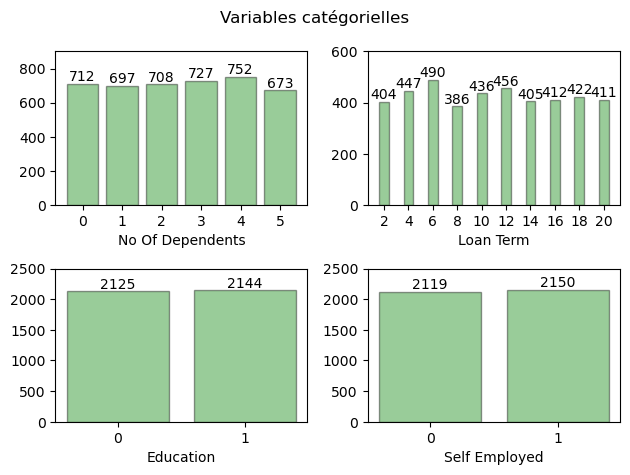

In [9]:
plot_categorielles(data, var_cat_names + var_bin_names)

In [10]:
### Fonction affichant les distributions des variables numériques

def plot_numeriques(data, var_num_names, norma=False):
    density = False
    kde = False
    if norma:
        density = True
        kde = True

    fig, axs = plt.subplots(3, 2, figsize=(10, 12))

    titles = [el.replace('_', ' ').title() for el in var_num_names]
    name1 = var_num_names[0]
    title1 = titles[0]
    sns.histplot(data[name1], bins=40, kde=kde, color="green", ax=axs[0, 0], alpha=0.4)
    axs[0, 0].set_xlabel(title1, fontsize=10)
    axs[0, 0].set_ylabel("")

    name2 = var_num_names[1]
    title2 = titles[1]
    sns.histplot(data[name2], bins=40, kde=kde, color="green", ax=axs[0, 1], alpha=0.4)
    axs[0, 1].set_xlabel(title2, fontsize=10)
    axs[0, 1].set_ylabel("")

    name3 = var_num_names[2]
    title3 = titles[2]
    sns.histplot(data[name3], bins=40, kde=kde, color="green", ax=axs[1, 0], alpha=0.4)
    axs[1, 0].set_xlabel(title3, fontsize=10)
    axs[1, 0].set_ylabel("")

    name4 = var_num_names[3]
    title4 = titles[3]
    sns.histplot(data[name4], bins=40, kde=kde, color="green", ax=axs[1, 1], alpha=0.4)
    axs[1, 1].set_xlabel(title4, fontsize=10)
    axs[1, 1].set_ylabel("")

    name5 = var_num_names[4]
    title5 = titles[4]
    sns.histplot(data[name5], bins=40, kde=True, color="green", ax=axs[2, 0], alpha=0.4)
    axs[2, 0].set_xlabel(title5, fontsize=10)
    axs[2, 0].set_ylabel("")

    fig.delaxes(axs[2, 1])

    plt.tight_layout()

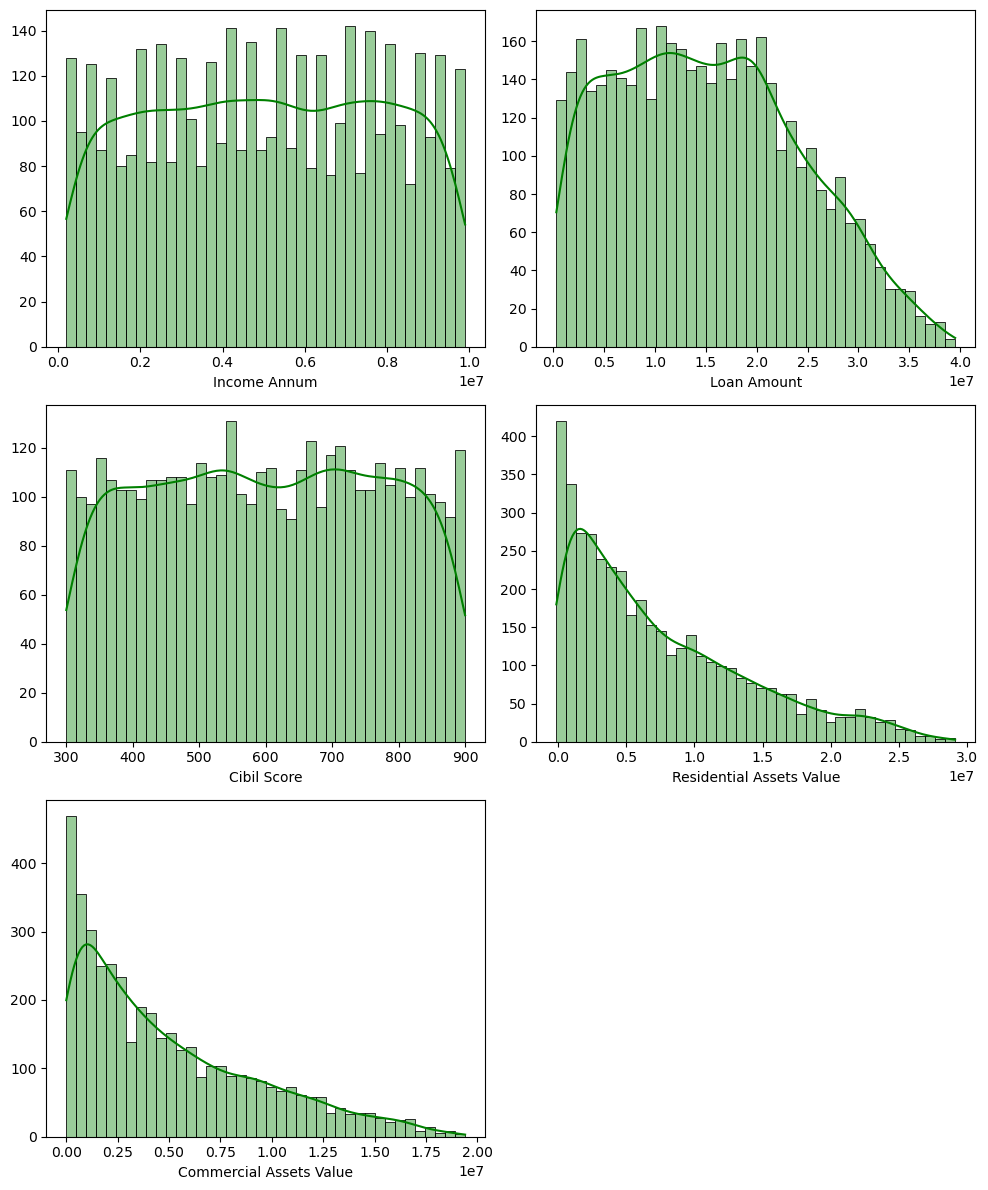

In [11]:
plot_numeriques(data, var_num_names, norma=True)

In [12]:
### Fonction pour effectuer des tests de Cramer sur les variables catégorielles

def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    return stat / (obs * mini)

In [13]:
### Fonction pour tester les corrélations entre les variables catégorielles

def test_cor_cat(data, vars_categorielles):
    vars_categorielles = pd.DataFrame([data[el] for el in vars_categorielles]).transpose()
    rows = []

    for var1 in vars_categorielles:
        col = []
        for var2 in vars_categorielles:
            cramers = cramers_V(vars_categorielles[var1], vars_categorielles[var2])
            col.append(round(cramers, 2))
        rows.append(col)

    cramers_results = np.array(rows)
    v_cramer_resultats = pd.DataFrame(
        cramers_results, columns=vars_categorielles.columns, index=vars_categorielles.columns
    )
    print("VARIABLES CATEGORIELLES TROP CORRELEES : ")
    count = 0
    for i in range(v_cramer_resultats.shape[0]):
        for j in range(i + 1, v_cramer_resultats.shape[0]):
            if v_cramer_resultats.iloc[i, j] > 0.7:
                count += 1
                print()
                print(
                    v_cramer_resultats.index.to_numpy()[i]
                    + " et "
                    + v_cramer_resultats.columns[j]
                    + " sont trop dépendantes, V-CRAMER = "
                    + str(v_cramer_resultats.iloc[i, j])
                )
    if count == 0:
        print("AUCUNE")

In [14]:
vars_cat = var_cat_names + var_bin_names
test_cor_cat(data, vars_cat)

VARIABLES CATEGORIELLES TROP CORRELEES : 
AUCUNE


In [15]:
### Fonction pour tester les corrélations entre les variables numériques

def test_cor_num(data, vars_numeriques, plot=False):
    vars_numeriques = pd.DataFrame([data[el] for el in vars_numeriques]).transpose()
    correlations_num = vars_numeriques.corr(method="pearson")
    nb_variables = correlations_num.shape[0]
    print("VARIABLES NUMERIQUES TROP CORRELEES : ")
    count = 0
    for i in range(nb_variables):
        for j in range(i + 1, nb_variables):
            if abs(correlations_num.iloc[i, j]) > 0.7:
                print()
                print(
                    correlations_num.index.to_numpy()[i]
                    + " et "
                    + correlations_num.columns[j]
                    + " sont trop dépendantes, corr = "
                    + str(round(correlations_num.iloc[i, j], 2))
                )
                count += 1
    if count == 0:
        print("AUCUNE")
    if plot:
        noms_attributs_abreges = [attribut.replace('_', ' ').title()[:] for attribut in correlations_num.columns]
        plt.figure(figsize=(8, 6))
        plt.figure(2)
        sns.heatmap(correlations_num, annot=True, cmap="viridis", fmt=".2f", annot_kws={"size": 12})
        plt.suptitle("Matrice de Corrélation des variables numériques", fontweight='bold')
        plt.xticks(ticks=0.5 + np.array(range(len(correlations_num.columns))), labels=noms_attributs_abreges)
        plt.yticks(ticks=0.5 + np.array(range(len(correlations_num.columns))), labels=noms_attributs_abreges)
        plt.tight_layout()

VARIABLES NUMERIQUES TROP CORRELEES : 

income_annum et loan_amount sont trop dépendantes, corr = 0.93

income_annum et luxury_assets_value sont trop dépendantes, corr = 0.93

income_annum et bank_asset_value sont trop dépendantes, corr = 0.85

loan_amount et luxury_assets_value sont trop dépendantes, corr = 0.86

loan_amount et bank_asset_value sont trop dépendantes, corr = 0.79

luxury_assets_value et bank_asset_value sont trop dépendantes, corr = 0.79


<Figure size 800x600 with 0 Axes>

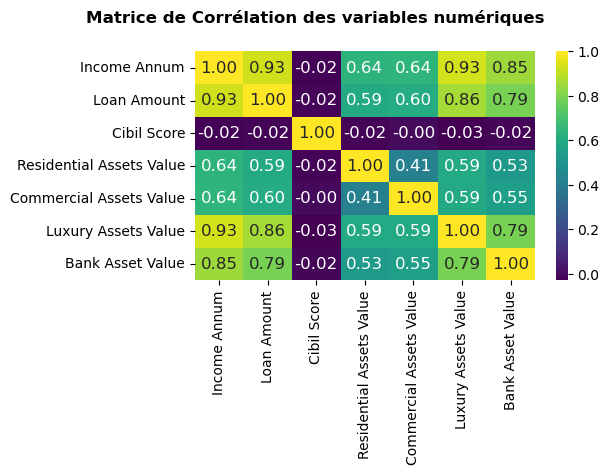

In [16]:
test_cor_num(data, var_num_names, plot=True)

In [17]:
# Fonction servant à supprimer des colonnes d'un dataframe Pandas

def drop(data, names, l):
    for name in names:
        l.remove(name)
        data = data.drop(name, axis=1)
    return data, l

In [18]:
## SUPPRESSION DES COLONNES REDONDANTES

data, var_num_names = drop(data, ["luxury_assets_value", "bank_asset_value"], var_num_names)

VARIABLES NUMERIQUES TROP CORRELEES : 

income_annum et loan_amount sont trop dépendantes, corr = 0.93


<Figure size 800x600 with 0 Axes>

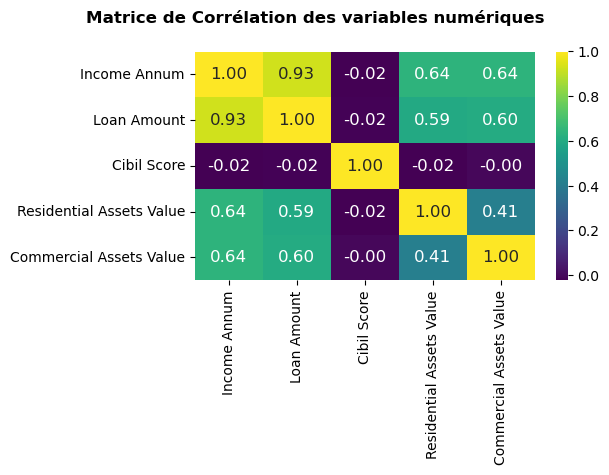

In [19]:
test_cor_num(data, var_num_names, plot=True)

# II. Transformation des données

In [20]:
### Fonction de transformation des données (Normalisation des variables numériques et One-Hot-Encoding des variables catégorielles)

def transform_data(data):
    var_num_names, var_cat_names, var_bin_names = types_var(data)
    data, var_num_names = drop(
        data, ["luxury_assets_value", "bank_asset_value"], var_num_names
    )

    var_cat = pd.DataFrame([data[col] for col in var_cat_names]).transpose()
    var_bin = pd.DataFrame([data[col] for col in var_bin_names]).transpose()
    var_num = pd.DataFrame([data[col] for col in var_num_names]).transpose()

    ### ONE HOT ENCODING FOR CATEGORICAL DATA
    preproc_ohe = OneHotEncoder(drop="first", sparse_output=False).fit(var_cat)
    variables_categorielles_ohe = preproc_ohe.transform(var_cat)
    variables_categorielles_ohe = pd.DataFrame(
        variables_categorielles_ohe, columns=preproc_ohe.get_feature_names_out(var_cat.columns)
    )

    ### NUMERIC DATA NORMALISATION
    scaler = StandardScaler()
    scaler.fit(var_num)
    var_num_scaled = pd.DataFrame(scaler.transform(var_num), columns=var_num.columns)

    ### MERGE DATASET
    X_temp = var_num_scaled.merge(variables_categorielles_ohe, left_index=True, right_index=True)
    X = X_temp.merge(var_bin, left_index=True, right_index=True)
    return X

# III. Chargement des données

In [21]:
### LOADING AND PROCESSING DATA

data, target = load_data()
X = transform_data(data)

# IV. Train-Test Split

In [23]:
## Random seed

seed = 42

In [24]:
from sklearn.model_selection import train_test_split

### TRAIN TEST SPLIT
size = 0.3
print()
print(f"TRAIN-TEST SPLIT : {(1 - size) * 100}% - {size * 100}%")
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=size, random_state=seed)


TRAIN-TEST SPLIT : 70.0% - 30.0%


# V. Choix du score de référence

In [25]:
### On choisit une métrique dans le tableau suivant qui servira pour l'entrainement et la cross-validation des modèles

## Score de référence
ref_score = ["accuracy", "f1", "precision", "recall", "kappa"][-1]

# VI. Modélisation et entraînement des modèles

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    multilabel_confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    cohen_kappa_score,
    auc,
)

In [27]:
## Paramètres des modèles sous la forme de dictionnaires

logistic_param = {"random_state": seed, "C": 0.8, "penalty": "l2"}
cart_param = {"random_state": seed, "criterion": "log_loss", "max_depth": 50, "min_samples_leaf": 4, "min_samples_split": 10}
forest_param = {"random_state": seed, "bootstrap": False, "max_depth": None, "min_samples_leaf": 4, "min_samples_split": 20, "n_estimators": 40}
GB_param = {"random_state": seed, "learning_rate": 0.2, "max_depth": 4, "min_samples_leaf": 5, "min_samples_split": 5, "n_estimators": 300}
MLP_param = {"random_state": seed, "activation": "tanh", "alpha": 0.1, "hidden_layer_sizes": (100,), "learning_rate": "adaptive", "max_iter": 1000}

In [28]:
## Définition des modèles

log = LogisticRegression(**logistic_param)
cart = DecisionTreeClassifier(**cart_param)
rf = RandomForestClassifier(**forest_param)
gb = GradientBoostingClassifier(**GB_param)
mlp = MLPClassifier(**MLP_param)

MODELS = [log, cart, rf, gb, mlp]
NAMES = ["Régression logistique", "CART", "Random Forest", "Gradient Boosting", "MLP Classifier"]

In [29]:
### Entraînement des modèles (Cross-Validation)

print()
print("Score utilisé : " + ref_score)
print()
print()

for i, model in enumerate(MODELS):
    name = NAMES[i]
    n_splits = 5
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    # Boucle sur les plis de la validation croisée
    for train_index, test_index in kf.split(X_train, y_train):
        X_t, X_val = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_t, y_val = np.array(y_train)[train_index], np.array(y_train)[test_index]

        model.fit(X_t, y_t)
        y_pred = model.predict(X_val)

        # Calcul du score
        if ref_score == "kappa":
            score = cohen_kappa_score(y_val, y_pred)
        elif ref_score == "recall":
            score = recall_score(y_val, y_pred)
        elif ref_score == "precision":
            score = precision_score(y_val, y_pred)
        elif ref_score == "accuracy":
            score = accuracy_score(y_val, y_pred)
        elif ref_score == "f1":
            score = f1_score(y_val, y_pred)

        scores.append(score)
    scores = np.array(scores)
    print()
    print("Modèle : " + name)
    print()
    print("Scores des validations croisées : ", scores.round(3))
    print("Moyenne des scores : {:.4f}".format(scores.mean()))
    print("Écart-type des scores : {:.4f}".format(scores.std()))
    print()


Score utilisé : kappa



Modèle : Régression logistique

Scores des validations croisées :  [0.881 0.859 0.926 0.9   0.847]
Moyenne des scores : 0.8826
Écart-type des scores : 0.0283


Modèle : CART

Scores des validations croisées :  [0.942 0.922 0.934 0.953 0.934]
Moyenne des scores : 0.9369
Écart-type des scores : 0.0103


Modèle : Random Forest

Scores des validations croisées :  [0.92  0.897 0.944 0.95  0.931]
Moyenne des scores : 0.9284
Écart-type des scores : 0.0186


Modèle : Gradient Boosting

Scores des validations croisées :  [0.964 0.936 0.941 0.968 0.955]
Moyenne des scores : 0.9526
Écart-type des scores : 0.0124


Modèle : MLP Classifier

Scores des validations croisées :  [0.957 0.94  0.944 0.968 0.913]
Moyenne des scores : 0.9442
Écart-type des scores : 0.0183



# VII. Prédictions sur l'ensemble Test

In [31]:
### PREDICT THE TEST
metrics = ["accuracy", "f1", "precision", "recall", "kappa"]

for i, model in enumerate(MODELS):
    name = NAMES[i]
    y_pred = model.predict(X_test)
    print()
    print("Modèle : " + name)
    print()
    # PRINT SCORE
    if "accuracy" in metrics:
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy sur le test : {:.3f}%".format(accuracy * 100))

    if "precision" in metrics:
        precision = precision_score(y_test, y_pred)
        print("Précision sur le test : {:.3f}".format(precision))

    if "recall" in metrics:
        precision = recall_score(y_test, y_pred)
        print("Recall sur le test : {:.3f}".format(precision))

    if "f1" in metrics:
        f1 = f1_score(y_test, y_pred)
        print("F1-Score sur le test : {:.3f}".format(f1))

    if "kappa" in metrics:
        kappa = cohen_kappa_score(y_test, y_pred)
        print("Kappa score sur le test : {:.3f}".format(kappa))


Modèle : Régression logistique

Accuracy sur le test : 92.194%
Précision sur le test : 0.947
Recall sur le test : 0.928
F1-Score sur le test : 0.938
Kappa score sur le test : 0.833

Modèle : CART

Accuracy sur le test : 97.424%
Précision sur le test : 0.980
Recall sur le test : 0.979
F1-Score sur le test : 0.980
Kappa score sur le test : 0.945

Modèle : Random Forest

Accuracy sur le test : 96.097%
Précision sur le test : 0.982
Recall sur le test : 0.956
F1-Score sur le test : 0.969
Kappa score sur le test : 0.917

Modèle : Gradient Boosting

Accuracy sur le test : 97.814%
Précision sur le test : 0.988
Recall sur le test : 0.978
F1-Score sur le test : 0.983
Kappa score sur le test : 0.953

Modèle : MLP Classifier

Accuracy sur le test : 96.565%
Précision sur le test : 0.978
Recall sur le test : 0.968
F1-Score sur le test : 0.973
Kappa score sur le test : 0.926


/home/lsaci/miniconda3/envs/ISF/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/lsaci/miniconda3/envs/ISF/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/lsaci/miniconda3/envs/ISF/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/lsaci/miniconda3/envs/ISF/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/lsaci/miniconda3/envs/ISF/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


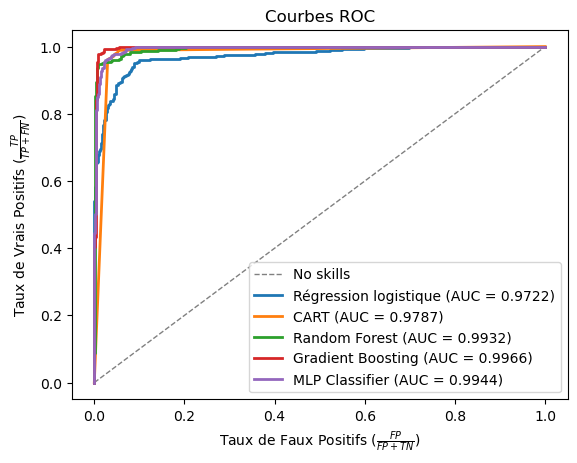

In [32]:
## Courbes ROC

plt.figure()
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1, label="No skills")
for i, model in enumerate(MODELS):
    name = NAMES[i]
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, seuils = roc_curve(y_test, y_scores)

    AUC = roc_auc_score(y_test, y_scores)

    # Tracer la courbe ROC
    plt.plot(fpr, tpr, lw=2, label=name + " (AUC = {:.4f})".format(AUC))
    plt.xlabel("Taux de Faux Positifs ($\\frac{FP}{FP + TN}$)")
    plt.ylabel("Taux de Vrais Positifs ($\\frac{TP}{TP + FN}$)")
    plt.title("Courbes ROC")
    plt.legend()

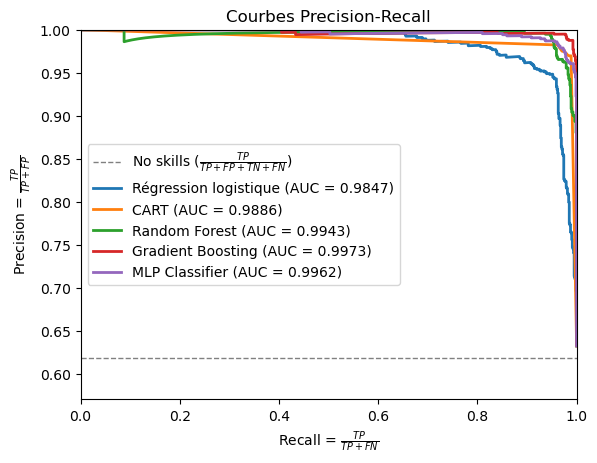

In [33]:
### Courbes Precision-Recall

plt.figure()
p = sum(y_train) / len(y_train)
plt.plot(
    [0, 1], [p, p], color="gray", linestyle="--", lw=1, label="No skills ($\\frac{TP}{TP + FP + TN + FN}$)"
)
for i, model in enumerate(MODELS):
    name = NAMES[i]
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, seuils = precision_recall_curve(y_test, y_scores)
    AUC = auc(recall, precision)
    # Tracer la courbe P-R
    plt.plot(recall, precision, lw=2, label=name + " (AUC = {:.4f})".format(AUC))
    plt.xlabel("Recall " + "= $\\frac{TP}{TP + FN}$")
    plt.ylabel("Precision " + "= $\\frac{TP}{TP + FP}$")
    plt.xlim([0, 1])
    plt.ylim([0.57, 1])
    plt.title("Courbes Precision-Recall")
    plt.legend()

# VIII. Combinaison de modèles

In [34]:
### On crée une classe "Combine", qui prend en entrée un dictionnaire de modèles pré-entrainés, associés à des poids


class Combine:
    def __init__(self, models, random_state=42):
        self.name = "Combinaison de modèles"
        self.seed = random_state
        self.models = models

    def fit(self, X, y):
        probas = np.zeros((y.shape[0], 2))
        for weight, model in self.models.items():
            model.fit(X, y)
        return None

    def predict_proba(self, X):
        dim = X.shape[0]
        probas = np.zeros((dim, 2))
        for weight, model in self.models.items():
            probas = probas + weight * model.predict_proba(X)
        probas = probas / len(self.models)
        return probas

    def predict(self, X):
        probas = self.predict_proba(X)
        y_pred = np.argmax(probas, axis=1)
        return y_pred

In [39]:
### Poids optimaux du modèle (A DETERMINER)

w_log, w_mlp, w_gb = 0.0, 0.25, 0.5
w_tree = 1 - (w_log + w_mlp + w_gb)

### Définition du modèle
models = {w_log: log, w_mlp: mlp, w_gb: gb, w_tree: cart}
combinaison = Combine(models)

In [40]:
### Cross-Validation

n_splits = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

# Boucle sur les plis de la validation croisée
for train_index, test_index in kf.split(X_train, y_train):
    X_t, X_val = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_t, y_val = np.array(y_train)[train_index], np.array(y_train)[test_index]

    combinaison.fit(X_t, y_t)
    y_pred = combinaison.predict(X_val)

    # Calcul du score
    if ref_score == "kappa":
        score = cohen_kappa_score(y_val, y_pred)
    elif ref_score == "recall":
        score = recall_score(y_val, y_pred)
    elif ref_score == "precision":
        score = precision_score(y_val, y_pred)
    elif ref_score == "accuracy":
        score = accuracy_score(y_val, y_pred)
    elif ref_score == "f1":
        score = f1_score(y_val, y_pred)
    scores.append(score)
scores = np.array(scores)

print()
print("Modele combiné")
print()
print("Score utilisé : " + ref_score)
print("Scores des validations croisées : ", scores.round(3))
print("Moyenne des scores : {:.4f}".format(scores.mean()))
print("Écart-type des scores : {:.4f}".format(scores.std()))
print()


Modele combiné

Score utilisé : kappa
Scores des validations croisées :  [0.964 0.936 0.951 0.968 0.952]
Moyenne des scores : 0.9540
Écart-type des scores : 0.0111



In [41]:
### Prédiction sur le Test

metrics = ["accuracy", "f1", "precision", "recall", "kappa"]

combinaison.fit(X_train, y_train)
y_pred = combinaison.predict(X_test)

print()
# PRINT SCORE
if "accuracy" in metrics:
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur le test : {:.3f}%".format(accuracy * 100))

if "precision" in metrics:
    precision = precision_score(y_test, y_pred)
    print("Précision sur le test : {:.3f}".format(precision))

if "recall" in metrics:
    precision = recall_score(y_test, y_pred)
    print("Recall sur le test : {:.3f}".format(precision))

if "f1" in metrics:
    f1 = f1_score(y_test, y_pred)
    print("F1-Score sur le test : {:.3f}".format(f1))

if "kappa" in metrics:
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Kappa score sur le test : {:.3f}".format(kappa))
print()


Accuracy sur le test : 98.439%
Précision sur le test : 0.989
Recall sur le test : 0.986
F1-Score sur le test : 0.988
Kappa score sur le test : 0.966



# IX. Choix du modèle final

Text(0.5, 1.0, 'Matrice de Confusion sur le test : Modèle combiné')

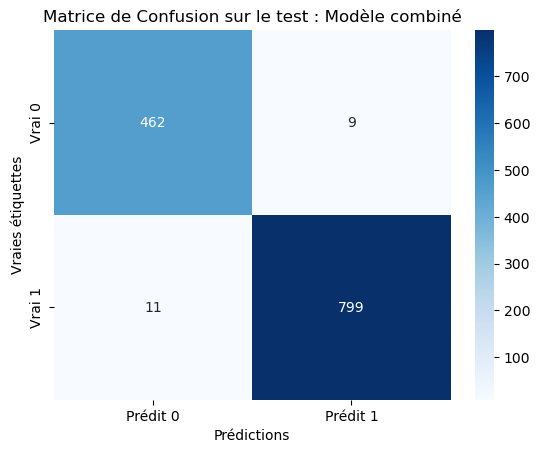

In [42]:
### Liste des modèles 

MODELS = [log, cart, rf, gb, mlp, combinaison]
NAMES = ["Régression logistique", "CART", "Random Forest", "Gradient Boosting", "MLP Classifier", "Modèle combiné"]


### On choisit le modèle final dans la liste
i = 5
model, name = MODELS[i], NAMES[i]

### Matrice de confusion
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)

plt.figure(42)
sns.heatmap(
    m,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Prédit 0", "Prédit 1"],
    yticklabels=["Vrai 0", "Vrai 1"],
)
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.title("Matrice de Confusion sur le test : " + name)